In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
from sklearn import metrics
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
nRowsRead = '4000' 
df1 = pd.read_csv('data/drugsComTrain_raw.csv', delimiter=',')
df1.dataframeName = 'drugsComTrain_raw.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 161297 rows and 7 columns


In [4]:
df1.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [6]:
df2 = pd.read_csv('data/drugsComTest_raw.csv', delimiter=',')
df2.dataframeName = 'drugsComTest_raw.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 53766 rows and 7 columns


Machine Learning

In [7]:
import seaborn as sns
%matplotlib inline
from matplotlib import style


In [8]:
df1.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [9]:
df2.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [10]:
print(f'train has {df1.shape[0]} number of rows and {df1.shape[1]} number of columns')
print(f'train has {df2.shape[0]} number of rows and {df2.shape[1]} number of columns')

train has 161297 number of rows and 7 number of columns
train has 53766 number of rows and 7 number of columns


In [11]:
merge = [df1,df2]
merged_data = pd.concat(merge,ignore_index=True)

merged_data.shape

(215063, 7)

In [12]:
merged_data['uniqueID'].nunique()

215063

In [13]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 11.5+ MB


In [14]:
merged_data.describe(include='all')

,uniqueID,drugName,condition,review,rating,date,usefulCount
count,215063.000000,215063,213869,215063,215063.000000,215063,215063.000000
unique,NaN,3671,916,128478,NaN,3579,NaN
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,1-Mar-16,NaN
freq,NaN,4930,38436,39,NaN,185,NaN
mean,116039.364814,NaN,NaN,NaN,6.990008,NaN,28.001004
std,67007.913366,NaN,NaN,NaN,3.275554,NaN,36.346069
min,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,58115.500000,NaN,NaN,NaN,5.000000,NaN,6.000000
50%,115867.000000,NaN,NaN,NaN,8.000000,NaN,16.000000
75%,173963.500000,NaN,NaN,NaN,10.000000,NaN,36.000000


In [15]:
merged_data.isnull().sum()/merged_data.shape[0]

uniqueID       0.000000
drugName       0.000000
condition      0.005552
review         0.000000
rating         0.000000
date           0.000000
usefulCount    0.000000
dtype: float64

In [16]:
print(merged_data['drugName'].nunique())
print(merged_data['condition'].nunique())

3671
916


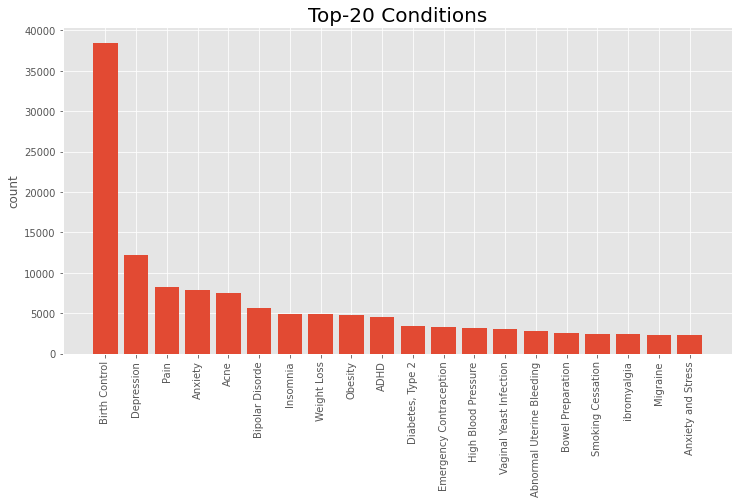

In [17]:
plt.figure(figsize=(12,6))
conditions = merged_data['condition'].value_counts(ascending = False).head(20)
plt.bar(conditions.index,conditions.values)
plt.title('Top-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

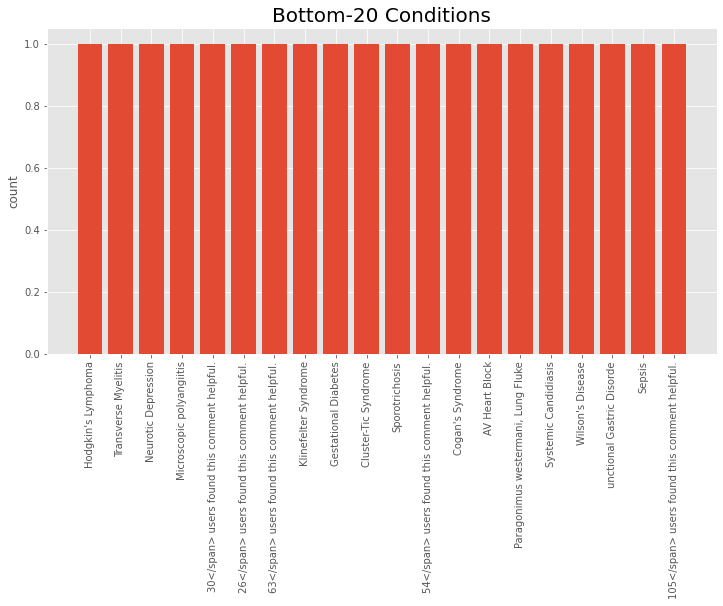

In [18]:
plt.figure(figsize=(12,6))
conditions_bottom = merged_data['condition'].value_counts(ascending = False).tail(20)

plt.bar(conditions_bottom.index,conditions_bottom.values)
plt.title('Bottom-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [19]:
ratings_ = merged_data['rating'].value_counts().sort_values(ascending=False).reset_index().\
                    rename(columns = {'index' :'rating', 'rating' : 'counts'})
ratings_['percent'] = 100 * (ratings_['counts']/merged_data.shape[0])
print(ratings_)

   rating  counts    percent
0      10   68005  31.620967
1       9   36708  17.068487
2       1   28918  13.446292
3       8   25046  11.645890
4       7   12547   5.834104
5       5   10723   4.985981
6       2    9265   4.308040
7       3    8718   4.053696
8       6    8462   3.934661
9       4    6671   3.101882


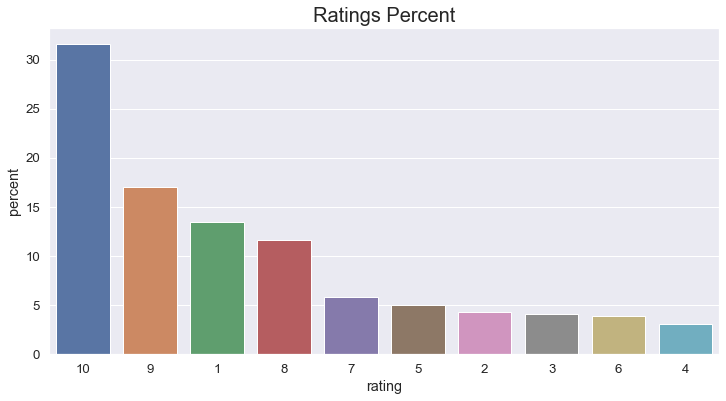

In [20]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]
sns.barplot(x = ratings_['rating'], y = ratings_['percent'],order = ratings_['rating'])
plt.title('Ratings Percent',fontsize=20)
plt.show()

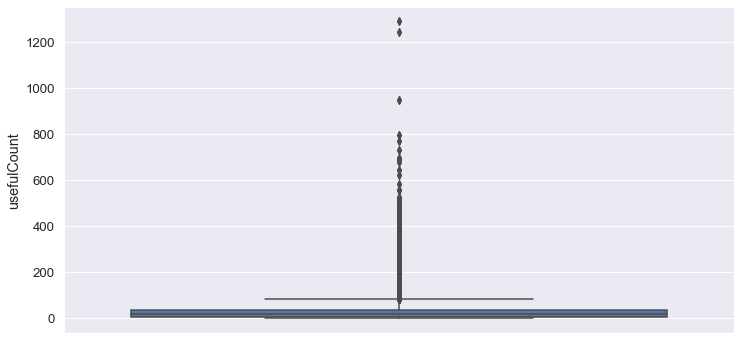

In [21]:
sns.boxplot(y = merged_data['usefulCount'])
plt.show()

In [22]:
merged_data.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(20)

condition
Not Listed / Othe                             253
Pain                                          219
Birth Control                                 181
High Blood Pressure                           146
Acne                                          127
Depression                                    115
Rheumatoid Arthritis                          107
Diabetes, Type 2                               97
Allergic Rhinitis                              95
Insomnia                                       85
Osteoarthritis                                 84
Bipolar Disorde                                82
Anxiety                                        81
Abnormal Uterine Bleeding                      77
Endometriosis                                  64
3</span> users found this comment helpful.     62
Psoriasis                                      61
Migraine                                       60
ADHD                                           58
4</span> users found this comment helpfu

In [23]:
span_data = merged_data[merged_data['condition'].str.contains('</span>',case=False,regex=True) == True]
print('Number of rows with </span> values : ', len(span_data))
noisy_data_ = 100 * (len(span_data)/merged_data.shape[0])
print('Total percent of noisy data {} %  '.format(noisy_data_))

Number of rows with </span> values :  1171
Total percent of noisy data 0.5444916140851751 %  


In [24]:
merged_data.drop(span_data.index, axis = 0, inplace=True)

In [25]:
not_listed = merged_data[merged_data['condition'] == 'not listed / othe']
print('Number of not_listed values : ', len(not_listed))
percent_not_listed = 100 * len(not_listed)/merged_data.shape[0]
print('Total percent of noisy data {} %  '.format(percent_not_listed))

Number of not_listed values :  0
Total percent of noisy data 0.0 %  


In [26]:
merged_data.drop(not_listed.index, axis = 0, inplace=True)

In [27]:
conditions_gp = merged_data.groupby('condition')['drugName'].nunique().sort_values(ascending=False)

In [28]:
drug_multiple_cond = merged_data.groupby('drugName')['condition'].nunique().sort_values(ascending=False)
print(drug_multiple_cond.head(10))

drugName
Prednisone       39
Gabapentin       31
Doxycycline      25
Ciprofloxacin    25
Amitriptyline    24
Venlafaxine      23
Metronidazole    23
Dexamethasone    22
Azithromycin     20
Triamcinolone    20
Name: condition, dtype: int64


In [29]:
merged_data[merged_data['rating'] == 10]['drugName'].nunique()

2914

In [30]:
merged_data[merged_data['drugName'] == 'Levonorgestrel']['condition'].unique()

array(['Emergency Contraception', 'Birth Control',
       'Abnormal Uterine Bleeding', nan, 'Not Listed / Othe'],
      dtype=object)

convert date to datetime and create year andd month features

In [31]:
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['year'] = merged_data['date'].dt.year  #create year
merged_data['month'] = merged_data['date'].dt.month #create month

In [32]:
merged_data.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
year              0
month             0
dtype: int64

In [33]:
merged_data.dropna(inplace=True, axis=0)

In [34]:
for i in merged_data['review'][0:3]:
    print(i,'\n')

"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil" 

"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective." 

"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestod

pre-processing

In [35]:
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
stops = set(stopwords.words('english')) #english stopwords

stemmer = SnowballStemmer('english') #SnowballStemmer

In [38]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [44]:
merged_data['review'] = merged_data['review'].apply(review_to_words)

In [45]:
merged_data['sentiment'] = merged_data["rating"].apply(lambda x: 1 if x > 5 else 0)

Deployment of ML

In [46]:
from sklearn.model_selection import train_test_split #import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer 
from sklearn.metrics import confusion_matrix #import confusion_matrix

TF-IDF vectorizer and transforms the corpus

In [47]:
vectorizer = TfidfVectorizer()
reviews_corpus = vectorizer.fit_transform(merged_data.review)
reviews_corpus.shape

(212698, 34709)

In [48]:
sentiment = merged_data['sentiment']
sentiment.shape

(212698,)

Data Splitting

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reviews_corpus,sentiment,test_size=0.33,random_state=42)
print('Train data shape ',X_train.shape,Y_train.shape)
print('Test data shape ',X_test.shape,Y_test.shape)

Train data shape  (142507, 34709) (142507,)
Test data shape  (70191, 34709) (70191,)


# **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier().fit(X_train, Y_train)
pred = RF.predict(X_test)

print("Accuracy: %s" % str(RF.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))


In [44]:
rf = RF.score(X_test, Y_test)

# **DecisionTreeClassifier**

In [45]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier().fit(X_train, Y_train)
pred = DT.predict(X_test)

print("Accuracy: %s" % str(DT.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

Accuracy: 0.6426380368098159
Confusion Matrix
[[ 74 113]
 [120 345]]


In [46]:
dt = DT.score(X_test, Y_test)

# **LogisticRegression**

In [47]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train, Y_train)
pred = LR.predict(X_test)

print("Accuracy: %s" % str(LR.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

Accuracy: 0.7361963190184049
Confusion Matrix
[[ 27   5]
 [167 453]]


In [48]:
lr = LR.score(X_test, Y_test)

# **KNN**

In [49]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier().fit(X_train, Y_train)
pred = KNN.predict(X_test)

print("Accuracy: %s" % str(KNN.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

Accuracy: 0.6840490797546013
Confusion Matrix
[[ 51  63]
 [143 395]]


In [50]:
kn = KNN.score(X_test, Y_test)

# **AdaBoostClassifier**

In [51]:
from sklearn.ensemble import AdaBoostClassifier
AB = AdaBoostClassifier().fit(X_train, Y_train)
pred = AB.predict(X_test)

print("Accuracy: %s" % str(AB.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

Accuracy: 0.7070552147239264
Confusion Matrix
[[ 74  71]
 [120 387]]


In [52]:
ab = AB.score(X_test, Y_test)

# Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
X_train1 = X_train.toarray()
X_test1 = X_test.toarray()
NB.fit(X_train1, Y_train)
pred = NB.predict(X_test1)

print("Accuracy: %s" % str(NB.score(X_test1, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

Accuracy: 0.6365030674846626
Confusion Matrix
[[ 83 126]
 [111 332]]


In [54]:
nb = NB.score(X_test1, Y_test)

# LightGBM

In [55]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(
    max_depth=7,
    lambda_l1=0.1,
    lambda_l2=0.01,
    learning_rate=0.01,
    n_estimators=500,
    reg_aplha=1.1,
    colsample_bytree=0.9,
    subsample=0.9,
    n_jobs=5
)
lgb.fit(X_train, Y_train)
pred = lgb.predict(X_test)

print("Accuracy: %s" % str(lgb.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

C:\Users\tarun\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[LightGBM] [Warning] Unknown parameter: reg_aplha
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
Accuracy: 0.7438650306748467
Confusion Matrix
[[ 59  32]
 [135 426]]


In [56]:
lg = lgb.score(X_test, Y_test)

# CatBoost

In [57]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(
    depth = 9, 
    reg_lambda=0.1,
    learning_rate = 0.09,
    iterations = 50
)
cb.fit(X_train, Y_train)
pred = cb.predict(X_test)

print("Accuracy: %s" % str(cb.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

0:	learn: 0.6700690	total: 447ms	remaining: 21.9s
1:	learn: 0.6552961	total: 659ms	remaining: 15.8s
2:	learn: 0.6328842	total: 922ms	remaining: 14.4s
3:	learn: 0.6164763	total: 1.17s	remaining: 13.4s
4:	learn: 0.6039755	total: 1.39s	remaining: 12.5s
5:	learn: 0.5878096	total: 1.62s	remaining: 11.9s
6:	learn: 0.5728045	total: 1.86s	remaining: 11.4s
7:	learn: 0.5659905	total: 2.08s	remaining: 10.9s
8:	learn: 0.5545212	total: 2.25s	remaining: 10.2s
9:	learn: 0.5434066	total: 2.41s	remaining: 9.65s
10:	learn: 0.5326745	total: 2.58s	remaining: 9.15s
11:	learn: 0.5260654	total: 2.74s	remaining: 8.69s
12:	learn: 0.5163968	total: 2.9s	remaining: 8.27s
13:	learn: 0.5117163	total: 3.07s	remaining: 7.89s
14:	learn: 0.5045452	total: 3.23s	remaining: 7.53s
15:	learn: 0.4971885	total: 3.4s	remaining: 7.21s
16:	learn: 0.4880978	total: 3.56s	remaining: 6.9s
17:	learn: 0.4827604	total: 3.73s	remaining: 6.63s
18:	learn: 0.4726267	total: 3.89s	remaining: 6.35s
19:	learn: 0.4660865	total: 4.06s	remaining:

In [58]:
cat = cb.score(X_test, Y_test)

# Voting Classifier

In [59]:
from sklearn.ensemble import VotingClassifier
clf1 = KNeighborsClassifier()
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = LGBMClassifier(
    max_depth=7,
    lambda_l1=0.1,
    lambda_l2=0.01,
    learning_rate=0.01,
    n_estimators=500,
    reg_aplha=1.1,
    colsample_bytree=0.9,
    subsample=0.9,
    n_jobs=5
)

eclf1 = VotingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lgb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, Y_train)
pred = eclf1.predict(X_test)

print("Accuracy: %s" % str(eclf1.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

[LightGBM] [Warning] Unknown parameter: reg_aplha
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
Accuracy: 0.7530674846625767
Confusion Matrix
[[ 45  12]
 [149 446]]


In [60]:
vot = eclf1.score(X_test, Y_test)

# **Accuracy Comparsion**

In [61]:
#make variabel for save the result and to show it
classifier = ('Random Forest','Decision Tree','Logistic Regression','KNN','Ada Boosting','Naive Bayes','LightGBM','CAtBoost','Voting Classifier')
y_pos = np.arange(len(classifier))
print(y_pos)
score = [rf,dt,lr,kn,ab,nb,lg,cat,vot]
print(score)

[0 1 2 3 4 5 6 7 8]
[0.74079754601227, 0.6426380368098159, 0.7361963190184049, 0.6840490797546013, 0.7070552147239264, 0.6365030674846626, 0.7438650306748467, 0.7331288343558282, 0.7530674846625767]


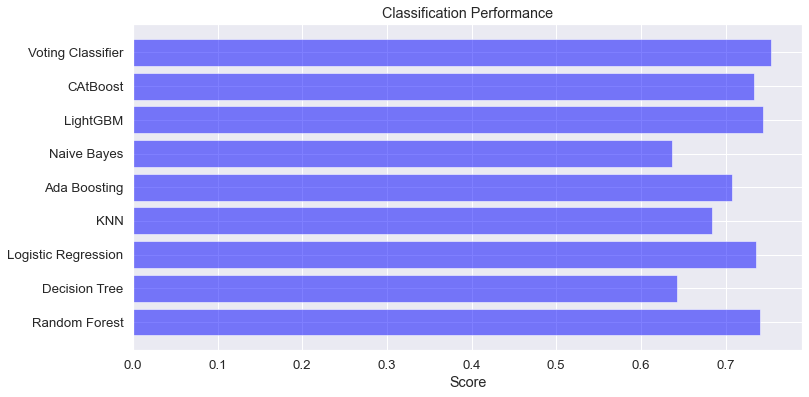

In [62]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

In [63]:
import joblib
filename = 'model.sav'
joblib.dump(eclf1, filename)

['model.sav']

# Grid Search CV - Naive Bayes

In [64]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB

skf = StratifiedKFold(n_splits=10)
params = {}
nb1 = MultinomialNB()
gs = GridSearchCV(nb1, cv=skf, param_grid=params, return_train_score=True)

gs.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=MultinomialNB(), param_grid={}, return_train_score=True)

In [65]:
nb1.fit(X_train, Y_train)
nb_cv = nb1.score(X_test, Y_test)

# Grid Search CV - LR

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,Y_train)

C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\model_se

C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\tarun\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [67]:
lr_cv = logreg_cv.score(X_test, Y_test)

# Comparison with CV

In [68]:
#make variabel for save the result and to show it
classifier = ('Random Forest','Decision Tree','Logistic Regression','KNN','Ada Boosting','Naive Bayes','LightGBM','CAtBoost','Voting Classifier','LR-GridSearchCV','NB-GridSearchCV')
y_pos = np.arange(len(classifier))
print(y_pos)
score = [rf,dt,lr,kn,ab,nb,lg,cat,vot,nb_cv,lr_cv]
print(score)

[ 0  1  2  3  4  5  6  7  8  9 10]
[0.74079754601227, 0.6426380368098159, 0.7361963190184049, 0.6840490797546013, 0.7070552147239264, 0.6365030674846626, 0.7438650306748467, 0.7331288343558282, 0.7530674846625767, 0.7024539877300614, 0.7684049079754601]


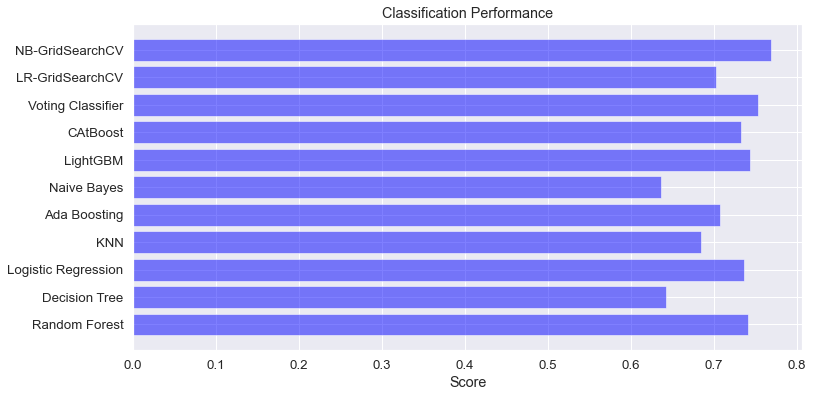

In [69]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

In [71]:
import joblib
filename = 'model1.sav'
joblib.dump(logreg_cv, filename)

['model1.sav']